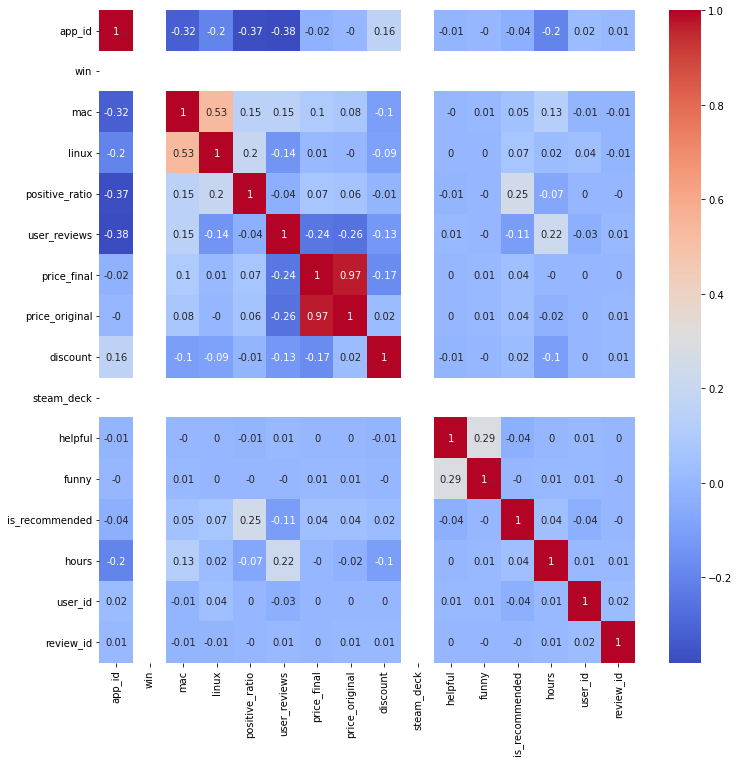

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

games = pd.read_csv('games.csv')
recommendations = pd.read_csv('recommendations.csv')

data = pd.merge(games, recommendations, on='app_id').head(50000)
data.dropna()

corr_matrix = data.corr().round(2)
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Extract the features and target variable
X = data[['win','linux','mac','rating','positive_ratio','user_reviews','price_final','price_original','discount','hours']]
y = data['is_recommended']

# Data pre-processing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['win'] = le.fit_transform(X['win'])
X['linux'] = le.fit_transform(X['linux'])
X['mac'] = le.fit_transform(X['mac'])
X['rating'] = le.fit_transform(X['rating'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a pipeline with a StandardScaler and KNeighborsClassifier
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=10))
])

# Fit the pipeline on training data
knn_pipeline.fit(X_train, y_train)

<ipython-input-6-d2965cc288be>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['win'] = le.fit_transform(X['win'])
<ipython-input-6-d2965cc288be>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['linux'] = le.fit_transform(X['linux'])
<ipython-input-6-d2965cc288be>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [7]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


ypred_test = knn_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)

ypred_testP = knn_pipeline.predict_proba(X_test)
try:
  auc = roc_auc_score(y_test, ypred_testP[:,-1])
  print(auc)
except:
  pass

[[  686  2441]
 [  826 16047]]
              precision    recall  f1-score   support

       False       0.45      0.22      0.30      3127
        True       0.87      0.95      0.91     16873

    accuracy                           0.84     20000
   macro avg       0.66      0.59      0.60     20000
weighted avg       0.80      0.84      0.81     20000

0.7165078073141112


In [8]:
from sklearn.linear_model import LogisticRegression

log_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', LogisticRegression(solver='lbfgs', C=0.1))
])

log_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', LogisticRegression(C=0.1))])

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


ypred_test = log_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)

ypred_testP = log_pipeline.predict_proba(X_test)
try:
  auc = roc_auc_score(y_test, ypred_testP[:,-1])
  print(auc)
except:
  pass

[[   90  3037]
 [  109 16764]]
              precision    recall  f1-score   support

       False       0.45      0.03      0.05      3127
        True       0.85      0.99      0.91     16873

    accuracy                           0.84     20000
   macro avg       0.65      0.51      0.48     20000
weighted avg       0.78      0.84      0.78     20000

0.7229217572667201


In [10]:
from sklearn.svm import LinearSVC

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(C=10))
])

svm_pipeline.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()), ('svm', LinearSVC(C=10))])

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


ypred_test = svm_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test, zero_division=1)

print(mat_clf)
print(report_clf)

decision_func = svm_pipeline.decision_function(X_test)
auc_score = roc_auc_score(y_test, decision_func)
print(auc_score)

[[   89  3038]
 [  106 16767]]
              precision    recall  f1-score   support

       False       0.46      0.03      0.05      3127
        True       0.85      0.99      0.91     16873

    accuracy                           0.84     20000
   macro avg       0.65      0.51      0.48     20000
weighted avg       0.79      0.84      0.78     20000

0.7270809160653153


In [12]:
from sklearn.svm import SVC
svm_rbf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=10, gamma=0.1, probability=True))
])

svm_rbf_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=10, gamma=0.1, probability=True))])

In [13]:
ypred_test = svm_rbf_pipeline.predict(X_test)
mat_svm = confusion_matrix(y_test, ypred_test)
report_svm = classification_report(y_test, ypred_test, zero_division=1)
auc_svm = roc_auc_score(y_test, svm_rbf_pipeline.predict_proba(X_test)[:,1])

print(mat_svm)
print(report_svm)
print('AUC:', auc_svm)

[[   60  3067]
 [   45 16828]]
              precision    recall  f1-score   support

       False       0.57      0.02      0.04      3127
        True       0.85      1.00      0.92     16873

    accuracy                           0.84     20000
   macro avg       0.71      0.51      0.48     20000
weighted avg       0.80      0.84      0.78     20000

AUC: 0.5783038569651937


In [14]:
svm_poly_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='poly', degree=3, C=10))
])

# Fit the pipeline on training data
svm_poly_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=10, kernel='poly'))])

In [15]:
y_pred = svm_poly_pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

cr = classification_report(y_test, y_pred)
print("Classification report:\n", cr)

y_pred_prob = svm_poly_pipeline.decision_function(X_test)
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC score:", auc)

Confusion matrix:
 [[   77  3050]
 [   79 16794]]
Classification report:
               precision    recall  f1-score   support

       False       0.49      0.02      0.05      3127
        True       0.85      1.00      0.91     16873

    accuracy                           0.84     20000
   macro avg       0.67      0.51      0.48     20000
weighted avg       0.79      0.84      0.78     20000

AUC score: 0.665251038955764
